In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0, '../')
import picea
picea.__version__,picea

('0.0.3_beta1', <module 'picea' from '../picea/__init__.py'>)

In [6]:
import numpy as np
from matplotlib import pyplot as plt
from picea import SequenceList

In [10]:
s = SequenceList()

seq1 = 'ACGTAGCAG'
seq2 = 'CCGTCGCAGA'
seq3 = 'ACGTAG-CA'

for seq in [seq1,seq2,seq3]:
    s['s'] = seq
s,s.headers

(<picea.sequence.SequenceList at 0x112198610>, ['s', 's_1', 's_2'])

In [ ]:
from matplotlib.colors import ListedColormap, BoundaryNorm

codes = np.array([*b'AaCcGgNnTt-'], dtype='uint8')
colors = np.array([
    *['green'] * 2,
    *['red'] * 2,
    *['blue'] * 2,
    *['gray'] * 2,
    *['darkorange'] * 2,
    'black'
])

order = np.argsort(codes) 
list(zip(codes[order],
colors[order]))



In [ ]:
cmap = ListedColormap(colors[order])
norm = BoundaryNorm([0,*codes[order]], ncolors=codes.size)

plt.imshow(norm(s._collection), cmap='jet')

In [20]:
!realpath {sys.path[1]}

/Users/rensholmer/Documents/Code/picea/examples


In [24]:
seq = SequenceList.from_fasta(filename='./HCT.fasta')
seq_aligned = seq.align()
seq_aligned

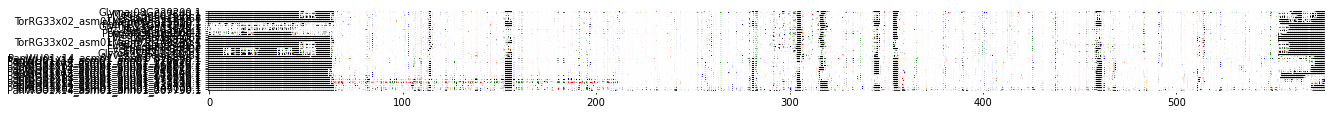

In [25]:
picea.msa_plot(seq_aligned)

In [27]:
seq_aligned.shape

(41, 577)

In [53]:
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, Plot, Grid, Range1d
from bokeh.models.glyphs import Text, Rect
from bokeh.layouts import gridplot
from bokeh.io import output_file, show

In [87]:
"""Bokeh sequence alignment view"""
colormap = {
    '-': 'white',
    'A': 'red',
    'C': 'red',
    'D': 'red',
    'E': 'red',
    'F': 'red',
    'G': 'blue',
    'H': 'blue',
    'I': 'blue',
    'K': 'yellow',
    'L': 'yellow',
    'M': 'yellow',
    'N': 'yellow',
    'P': 'yellow',
    'Q': 'darkorange',
    'R': 'darkorange',
    'S': 'darkorange',
    'T': 'pink',
    'V': 'brown',
    'W': 'purple',
    'Y': 'cyan'
}

#make sequence and id lists from the aln object
# seqs = [rec.seq for rec in (aln)]
# ids = [rec.id for rec in aln]    
# text = [i for s in list(seqs) for i in s]
# colors = get_colors(seqs)    
# N = len(seqs[0])
# S = len(seqs)    
width = .4

N = seq_aligned.n_chars
S = seq_aligned.n_seqs

text = [t.decode('utf-8') for t in 
        seq_aligned._collection.view('S1').ravel()]
colors = [colormap[t] for t in text]

x = np.arange(1,N+1)
y = np.arange(0,S,1)
#creates a 2D grid of coords from the 1D arrays
xx, yy = np.meshgrid(x, y)
#flattens the arrays
gx = xx.ravel()
gy = yy.flatten()
#use recty for rect coords with an offset
recty = gy+.5
h= 1/S

#now we can create the ColumnDataSource with all the arrays
source = ColumnDataSource(dict(x=gx, y=gy, recty=recty, 
                               text=text, colors=colors))



fontsize="9pt"
plot_width=800
plot_height = S*15+50
x_range = Range1d(0,N+1, bounds='auto')
if N>100:
    viewlen=100
else:
    viewlen=N
#view_range is for the close up view
view_range = (0,viewlen)
tools="xpan, xwheel_pan, reset, save"

#entire sequence view (no text, with zoom)
p = figure(title=None, plot_width= plot_width, plot_height=50,
           x_range=x_range, y_range=(0,S), tools=tools,
           min_border=0, toolbar_location='below')
rects = Rect(x="x", y="recty",  width=1, height=1, fill_color="colors",
             line_color=None, fill_alpha=0.6)
p.add_glyph(source, rects)
p.yaxis.visible = False
p.grid.visible = False 
#p

#sequence text view with ability to scroll along x axis
p1 = figure(title=None, plot_width=plot_width, plot_height=plot_height,
            x_range=view_range, y_range=seq_aligned.headers, tools="xpan,reset",
            min_border=0, toolbar_location='below')#, lod_factor=1)          
glyph = Text(x="x", y="y", text="text", text_align='center',text_color="black",
            text_font="monospace",text_font_size=fontsize)
rects = Rect(x="x", y="recty",  width=1, height=1, fill_color="colors",
            line_color=None, fill_alpha=0.4)
p1.add_glyph(source, glyph)
p1.add_glyph(source, rects)

p1.grid.visible = False
p1.xaxis.major_label_text_font_style = "bold"
p1.yaxis.minor_tick_line_width = 0
p1.yaxis.major_tick_line_width = 0
#p1

grid = gridplot([[p],[p1]], toolbar_location='below')
show(grid)